# Building and Visualizing word frequencies


In this lab, we will focus on the `build_freqs()` helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset in the week's programming assignment. Let's see how this function is implemented under the hood in this notebook.

## Setup

Let's import the required libraries for this lab: 

In [1]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

nltk.download('twitter_samples')

C:\Users\Hamad\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

#### Import some helper functions that we provided in the utils.py file:
* `process_tweet()`: Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label `1` or a negative label `0`. It then builds the `freqs` dictionary, where each key is a `(word,label)` tuple, and the value is the count of its frequency within the corpus of tweets.

In [2]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hamad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load the NLTK sample dataset

As in the previous lab, we will be using the [Twitter dataset from NLTK](http://www.nltk.org/howto/twitter.html#Using-a-Tweet-Corpus).

In [3]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


Next, we will build an array of labels that matches the sentiments of our tweets.  This data type works pretty much like a regular list but is optimized for computations and manipulation. The `labels` array will be composed of 10000 elements. The first 5000 will be filled with `1` labels denoting positive sentiments, and the next 5000 will be `0` labels denoting the opposite. We can do this easily with a series of operations provided by the `numpy` library:

* `np.ones()` - create an array of 1's
* `np.zeros()` - create an array of 0's
* `np.append()` - concatenate arrays

In [4]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
labels.shape

(10000,)

## Dictionaries

In Python, a dictionary is a mutable and indexed collection. It stores items as key-value pairs and uses [hash tables](https://en.wikipedia.org/wiki/Hash_table) underneath to allow practically constant time lookups. In NLP, dictionaries are essential because it enables fast retrieval of items or containment checks even with thousands of entries in the collection.

### Definition

A dictionary in Python is declared using curly brackets. Look at the next example:

In [5]:
dictionary = {
    'key1': 1,
    'key2': 2
}

The former line defines a dictionary with two entries. Keys and values can be almost any type ([with a few restriction on keys](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)), and in this case, we used strings. We can also use floats, integers, tuples, etc.

### Adding or editing entries

New entries can be inserted into dictionaries using square brackets. If the dictionary already contains the specified key, its value is overwritten.  

In [6]:
# Add a new entry
dictionary['key3'] = -5

# Overwrite the value of key1
dictionary['key1'] = 0

print(dictionary)

{'key1': 0, 'key2': 2, 'key3': -5}


### Accessing values and lookup keys

Performing dictionary lookups and retrieval are common tasks in NLP. There are two ways to do this: 

* Using square bracket notation: This form is allowed if the lookup key is in the dictionary. It produces an error otherwise.
* Using the [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) method: This allows us to set a default value if the dictionary key does not exist. 

Let us see these in action:

In [7]:
# Square bracket lookup when the key exist
print(dictionary['key2'])

2


However, if the key is missing, the operation produce an error

In [8]:
# The output of this line is intended to produce a KeyError
# print(dictionary['key8'])

When using a square bracket lookup, it is common to use an if-else block to check for containment first (with the keyword `in`) before getting the item. On the other hand, you can use the `.get()` method if you want to set a default value when the key is not found. Let's compare these in the cells below:

In [9]:
# This prints a value
if 'key1' in dictionary:
    print("item found: ", dictionary['key1'])
else:
    print('key1 is not defined')

# Same as what you get with get
print("item found: ", dictionary.get('key1', -1))

item found:  0
item found:  0


In [10]:
# This prints a message because the key is not found
if 'key7' in dictionary:
    print(dictionary['key7'])
else:
    print('key does not exist!')

# This prints -1 because the key is not found and we set the default to -1
print(dictionary.get('key7', -1))

key does not exist!
-1


## Word frequency dictionary

Now that we know the building blocks, let's finally take a look at the **build_freqs()** function in **utils.py**. This is the function that creates the dictionary containing the word counts from each corpus.

```python
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs
```

You can also do the for loop like this to make it a bit more compact:

```python
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
```

This is the code from utils.py

In [11]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

As shown above, each key is a 2-element tuple containing a `(word, y)` pair. The `word` is an element in a processed tweet while `y` is an integer representing the corpus: `1` for the positive tweets and `0` for the negative tweets. The value associated with this key is the number of times that word appears in the specified corpus. For example: 

``` 
# "followfriday" appears 25 times in the positive tweets
('followfriday', 1.0): 25

# "shame" appears 19 times in the negative tweets
('shame', 0.0): 19 
```

Now, it is time to use the dictionary returned by the `build_freqs()` function. First, let us feed our `tweets` and `labels` lists then print a basic report:

In [12]:
### There is a problem ###

# # create frequency dictionary
freqs = build_freqs(tweets, labels)

# # check data type
print(f'type(freqs) = {type(freqs)}')

# # check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13173


Now print the frequency of each word depending on its class.

In [13]:
pos, neg = [], []

for e in freqs:
    if e[1] == 1.0: # Is the word in positive?
        # Add the word with its frequency in the positive set.
        pos.append(str(e[0]) + ' ' + str(freqs[e]))
    else:
        # Add the word with its frequency in the negative set.
        neg.append(str(e[0]) + ' ' + str(freqs[e]))

In [14]:
print(len(pos))
print()

for p in pos:
    print(p)

6700

followfriday 25
top 32
engag 7
member 16
commun 33
week 83
:) 3691
hey 77
jame 7
odd 2
:/ 5
pleas 99
call 37
contact 7
centr 2
02392441234 1
abl 8
assist 1
mani 33
thank 643
listen 17
last 47
night 68
bleed 2
amaz 51
track 5
scotland 2
congrat 21
yeaaah 1
yipppi 1
accnt 2
verifi 2
rqst 1
succeed 1
got 69
blue 9
tick 1
mark 1
fb 6
profil 2
15 5
day 246
one 131
irresist 2
flipkartfashionfriday 17
like 233
keep 68
love 401
custom 4
wait 70
long 36
hope 143
enjoy 79
happi 212
friday 116
lwwf 1
second 10
thought 29
’ 21
enough 18
time 128
dd 1
new 146
short 7
enter 9
system 2
sheep 1
must 19
buy 12
jgh 4
go 151
bayan 1
:d 658
bye 8
act 8
mischiev 1
etl 1
layer 1
in-hous 1
wareh 1
app 16
katamari 1
well 81
… 38
name 18
impli 1
:p 139
influenc 18
big 34
... 290
juici 3
selfi 12
follow 447
u 245
back 163
perfect 24
alreadi 28
know 155
what' 17
great 172
opportun 23
junior 2
triathlet 1
age 2
12 5
13 6
gatorad 1
seri 5
get 209
entri 4
lay 4
greet 5
card 8
rang 3
print 4
today 113
job 41
:

adrian 1
parcel 2
tuesday 7
pri 3
80 3
wz 1
pattern 1
cut 3
buttonhol 1
4mi 1
famou 1
client 1
p 3
aliv 2
trial 1
spm 1
dinooo 1
cardio 1
steak 1
cue 1
laptop 1
guinea 1
pig 1
salamat 1
sa 6
mga 1
nag.greet 1
guis 1
godbless 2
crush 3
appl 4
deserv 11
charl 1
workhard 1
model 7
forrit 1
bread 2
bacon 2
butter 2
afang 2
soup 2
semo 2
brb 1
forc 2
lblogger 1
pblogger 1
bookreview 1
toddlerlif 1
doesnt 5
tato 1
bulat 1
concern 1
snake 1
perform 3
con 1
todayyy 1
max 2
gaza 1
bbb 1
pc 3
22 2
legal 1
ditch 2
tori 1
bajrangibhaijaanhighestweek 7
s'okay 1
andi 2
you-and 1
return 3
tuitutil 1
bud 2
learn 8
takeaway 1
instead 7
1hr 1
genial 1
competit 1
yosh 1
procrastin 1
plu 4
kfc 2
itun 1
dedicatedfan 1
💜 7
daft 1
teeth 1
troubl 1
huxley 1
basket 2
ben 2
sent 8
gamer 3
activ 5
120 2
distanc 2
suitabl 1
stockholm 1
zack 1
destroy 1
heel 2
claw 1
q 2
blond 2
box 3
cheerio 1
seed 4
cutest 2
ffback 2
spotifi 3
we'v 7
vc 1
tgp 1
race 5
averag 2
joe' 1
bluejay 1
vinylbear 1
pal 1
furbabi 1
luff 1


enterprison 1
schoolsoutforsumm 1
fellow 4
juggl 1
purrtho 1
catho 1
catami 1
fourfivesecond 4
deaf 4
drug 1
alcohol 1
apexi 3
crystal 3
meth 1
champagn 1
fc 1
streamer 1
juic 1
correct 1
portrait 1
izumi 1
fugiwara 1
clonmel 1
vibrant 1
estim 1
server 2
quiet 1
yey 1
insha'allah 1
wil 1
x21 1
trend 3
akshaymostlovedsuperstarev 1
indirect 1
askurban 1
lyka 2
mobilegam 2
io 2
nap 4
aff 1
unam 1
jonginuh 1
forecast 2
10am 2
5am 1
sooth 1
vii 1
sweetheart 1
freak 3
zayn 3
fucker 1
pet 2
illustr 1
wohoo 1
gleam 1
paint 4
deal 2
prime 2
minist 2
sunjam 1
industri 1
present 7
practic 3
proactiv 1
environ 1
unreal 1
zain 1
zac 1
isaac 1
oss 1
frank 1
iero 1
phase 2
david 1
beginn 1
shine 3
sunflow 2
tommarow 1
yall 2
rank 2
birthdaymonth 1
vianey 1
juli 12
birthdaygirl 1
town' 1
andrew 2
otwol 1
awhil 1
x20 1
all-tim 1
julia 1
robert 1
awwhh 1
bulldog 1
unfortun 2
02079 1
490 1
132 1
born 2
fightstickfriday 1
extravag 2
tearout 1
selekt 1
yoot 1
cross 3
gudday 1
dave 5
haileyhelp 1
eid 2
muba

clark 1
field 1
pampanga 1
hotairballoon 1
troll 1
⚡ 1
👏 3
brow 1
oili 1
maricarljanah 1
navi 1
battlefield 1
6:15 1
degre 3
fahrenheit 1
🍸 7
╲ 4
─ 8
╱ 5
🍤 4
╭ 4
╮ 4
┓ 2
┳ 1
┣ 1
╰ 3
╯ 3
┗ 2
┻ 1
stool 1
toppl 1
findyourfit 1
prefer 2
whomosexu 1
stack 1
pandora 3
digitalexet 1
digitalmarket 1
sociamedia 1
nb 1
bom 1
dia 1
todo 1
forklift 1
warehous 1
worker 1
lsceen 1
immatur 1
gandhi 1
grassi 1
feetblog 2
infrar 1
daughter 3
4yr 1
old-porridg 1
fiend 1
2nite 1
comp 1
vike 1
t20blast 1
np 1
tax 1
ooohh 1
petjam 1
virtual 2
pounc 1
bentek 1
agn 1
socialmedia@dpdgroup.co.uk 1
sam 3
fruiti 1
vodka 2
sellyourcarin 2
5word 2
chaloniklo 2
pic.twitter.com/jxz2lbv6o 1
paperwhite' 1
laser-lik 1
focu 1
ghost 3
tagsforlikesapp 2
instagood 2
tbt 1
socket 1
spanner 1
😴 1
pglcsgo 1
x2 1
crave 1
slower 1
sjw 1
cakehamp 1
glow 2
yayyy 1
merced 1
hood 1
badg 1
host 1
drone 1
blow 1
ignor 1
retali 1
bolling 1
where' 1
denmark 1
whitey 1
cultur 2
course 1
intro 2
graphicdesign 1
videograph 1
space 2
ted' 

In [15]:
print(len(neg))
print()

for n in neg:
    print(n)

6473

hopeless 2
tmr 3
:( 4584
everyth 17
kid 20
section 3
ikea 1
cute 43
shame 19
i'm 343
nearli 3
19 8
2 41
month 23
heart 27
slide 1
wast 5
basket 1
“ 15
hate 57
japanes 4
call 29
bani 2
” 11
dang 2
start 44
next 40
week 56
work 133
oh 92
god 15
babi 47
face 20
make 102
smile 10
neighbour 1
motor 1
ask 29
said 33
updat 11
search 3
sialan 1
athabasca 2
glacier 2
1948 1
:-( 501
jasper 1
jaspernationalpark 1
alberta 1
explorealberta 1
… 18
realli 133
good 101
g 8
idea 10
never 57
go 224
meet 32
mare 1
ivan 1
happi 25
trip 11
keep 34
safe 5
see 125
soon 46
tire 50
hahahah 3
knee 2
replac 4
get 233
day 150
ouch 3
relat 2
sweet 7
n 22
sour 2
kind 11
bi-polar 1
peopl 75
life 33
... 332
cuz 4
full 16
pleass 2
im 129
sure 31
tho 28
feel 158
stupid 8
can't 180
seem 15
grasp 1
basic 2
digit 8
paint 3
noth 26
i'v 77
research 1
help 54
lord 2
lone 9
someon 57
talk 46
guy 62
girl 28
assign 5
project 3
😩 14
want 246
play 48
video 23
game 28
watch 77
movi 24
choreograph 1
hard 35
email 10
link 12
s

upon 1
penni 1
ebook 1
фотосет 1
addicted-to-analsex 1
sweetbj 2
blowjob 1
mhhh 1
sed 1
sg 1
dinner 4
bless 2
mee 2
enviou 1
eonni 1
lovey 1
dovey 1
dongsaeng 1
workin 1
tuesday 4
schade 3
belfast 1
jealou 9
jacob 5
isco 4
peni 1
everi 16
convers 6
wonder 11
soul 5
nation 2
louisiana 4
lafayett 2
matteroftheheart 1
waduh 1
pant 3
suspend 2
believ 14
teenag 2
clich 1
youuu 5
rma 1
jersey 2
fake 4
jaclintil 1
model 9
likeforlik 7
mpoint 4
hotfmnoaidilforariana 2
ran 5
fuckkk 1
jump 3
justin 3
finish 14
sanum 1
llaollao 1
foood 1
ubericecream 14
glare 1
vine 3
tweetin 1
mood 3
elbow 1
choreo 1
offens 2
yeyi 1
hd 2
brow 1
kit 6
slightli 2
monday 10
sux 1
enjoy 9
nothaveld 1
765 1
edm 1
likeforfollow 3
hannib 3
mosquito 2
bite 5
kinki 1
hsould 1
justget 1
marri 2
la 11
shuffl 4
int 1
buckl 1
spring 1
millz 1
aski 2
awusasho 1
unlucki 2
driver 7
briefli 1
spot 4
144p 1
brook 1
crack 2
＠ 5
maverickgam 4
07:32 1
07:25 1
max 3
file 2
extern 2
sd 1
airdroid 1
android 2
4.4+ 1
googl 5
alright 3
c

510 1
silicon 1
cover 2
kbye 1
ini 1
anytim 1
citizen 1
compar 2
rank 1
mcountdown 2
5h 1
thapelo 1
op 1
civ 1
wooden 1
mic 1
embarrass 2
translat 3
daili 3
mecha-totem 1
nak 1
tgk 1
townsss 1
jokid 1
rent 2
degre 1
inconsider 2
softbal 1
appli 1
tomcat 1
chel 1
jemma 1
detail 4
list 4
matchi 2
elsa 1
postpon 1
karin 1
honey 2
vist 1
unhealthi 1
propa 1
knockin 1
bacon 1
market 2
pre-holiday 1
diet 1
meani 1
deathbybaconsmel 1
init 2
destin 1
victoria 2
luna 1
krystal 1
sarajevo 1
haix 2
sp 1
student 4
wii 2
bayonetta 1
101 1
doabl 1
drove 1
agenc 1
story.miss 1
everon 1
jp 1
mamabear 1
imintoh 1
underr 1
slovakia' 1
d: 6
saklap 1
grade 2
rizal 1
lib 1
discuss 1
advisori 1
period 2
dit 1
du 1
harsh 2
ohgod 1
abligaverin 2
photooftheday 2
sexygirlbypreciouslemmi 3
ripsandrabland 1
edel 1
salam 1
mubark 1
dong 3
tammirossm 4
speck 1
abbymil 2
18 8
ion 1
5min 1
hse 1
noob 1
nxt 1
2week 1
300 3
fck 2
nae 2
deep 3
human 3
whit 1
van 4
bristol 1
subserv 1
si 4
oo 1
tub 1
penyfan 1
forecast 2

c'mon 1
swimmer' 1
leh 1
corner 1
didnot 1
usanel 2
nathan 1
micha 1
fave 2
creep 1
throughout 1
whose 1
ave 1
tripl 1
lectur 1
2-5 1
jaw 1
quarter 1
soni 1
followmeaaron 1
tzelumxoxo 1
drank 1
mew 1
indic 1
ouliv 1
70748 1
viernesderolenahot 1
longmorn 1
tobermori 1
32 1
tail 1
recuerda 1
tanto 1
bath 1
muna 1
await 1
urslef 1
lime 1
truckload 1
favour 2
spectat 1
sail 1
w'end 1
bbc 1
‘ 1
foil 1
ac45 1
catamaran 1
peli 1
829 1
sextaatequemfimseguesdvcomvalentino 1
befor 1
valu 1
cinnamon 1
mtap 1
peng 1
frozen 1
bagu 1
emang 1
engg 1
cmc 1
mage 1
statement 1
moodsw 1
termin 1
men 1
peep 1
multipl 1
mef 1
rebound 1
pooor 1
2am 1
perpetu 1
bitchfac 1
clever 1
iceland 1
zayn_come_back_we_miss_y 1
pmsl 1
mianh 1
milkeu 1
lrt 1
bambam 1
soda 1
payback 1
87000 1
jobe 1
muchi 1
🎈 1
bathroom 1
lagg 1
banget 1
novel 1
there'd 1
invis 1
scuttl 1
worm 1
bauuukkk 1
damnnn 1
finee 1
omaigoshhh 1
jessica 1
5:15 1
argument 1
couldnt 2
yepp 1
😺 1
💒 1
💎 1
feelin 1
biscuit 1
slather 1
jsut 1
belov 1
gr

Unfortunately, this does not help much to understand the data. It would be better to visualize this output to gain better insights.

## Table of word counts

We will select a set of words that we would like to visualize. It is better to store this temporary information in a table that is very easy to use later.

In [16]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 212, 25],
 ['merri', 1, 0],
 ['nice', 99, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':(', 1, 4584],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 5, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. `:)` has 3691 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral. 

C:\Users\Hamad\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


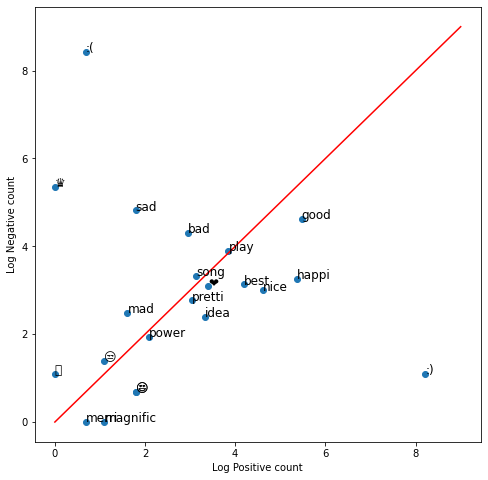

In [17]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons `:)` and `:(` are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!

Furthermore, what is the meaning of the crown symbol? It seems to be very negative!

### That's all for this lab! We've seen how to build a word frequency dictionary and this will come in handy when extracting the features of a list of tweets. Next up, we will be reviewing Logistic Regression. Keep it up!